In [5]:
#%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
%matplotlib inline

# Import packages
from zipfile import ZipFile
import pickle
from pathlib import Path
import pandas as pd
import numpy as np
import re
from string import punctuation
import matplotlib.pylab as plt
from matplotlib.pyplot import cm
from collections import Counter

import sys
!{sys.executable} -m pip install dmba
from dmba import printTermDocumentMatrix, classificationSummary, liftChart

#scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

     |████████████████████████████████| 11.8 MB 4.9 MB/s 
no display found. Using non-interactive Agg backend


In [2]:
#nltk
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer


In [3]:
#pip uninstall nltk

Found existing installation: nltk 3.7
Uninstalling nltk-3.7:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.7/dist-packages/nltk-3.7.dist-info/*
    /usr/local/lib/python3.7/dist-packages/nltk/*
Proceed (y/n)? y
  Successfully uninstalled nltk-3.7
y


In [4]:
#pip install -U nltk

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)


In [3]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Data sampling

In [4]:
from google.colab import drive
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_rev.csv', encoding= 'unicode_escape')

Mounted at /content/drive


In [5]:
train_df.shape

(244768, 12)

In [6]:
train_df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [7]:
train_df.dtypes

Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
dtype: object

In [8]:
data_A = train_df.sample(n=2500)
data_B = train_df.sample(n=2500)

Part A

A1. What are the top 5 parts of speech in the job descriptions? How frequently do they appear? How do these numbers change if you exclude stopwords? 

In [9]:
#tokenize
def tokenize(x):
    xtoken = word_tokenize(x)    #alternatively: xtoken = x.strip().split(' ') [using the re package will also tokenize words]
    return xtoken

# set df to lower case before applying tokenization function
data_A['FullDescription_tokenized'] = data_A['FullDescription'].map(tokenize)
data_A['FullDescription_tokenized'].head(10)

232821    [Rail, Construction, Manager, required, for, o...
169529    [Eurostaff, Group, Ltd, is, an, award, winning...
120152    [Based, in, Middlesex, ,, the, Senior, Power, ...
2412      [We, are, looking, to, recruit, an, experience...
234611    [Accounts, Payable, Assistant, De, Vere, Venue...
147714    [Our, client, is, seeking, a, processdriven, a...
178831    [Our, highly, prestigious, client, based, in, ...
87        [Chef, De, Partie, Norfolk, Live, In, up, to, ...
181439    [Duration, :, Permanent, Description, :, d, A,...
154136    [Policy, Analyst, ,, Smarter, Markets, Strateg...
Name: FullDescription_tokenized, dtype: object

In [10]:
data_A = data_A.reset_index()

In [11]:
print(data_A['FullDescription'][1])

Eurostaff Group Ltd is an award winning International Recruitment Consultancy specialising in the recruitment of senior level professionals in the niche sectors of Finance, IT, Energy and Analytics. Since inception the business has gone from strength to strength, appearing for two consecutive years in the Sunday Times Fast Track **** and Recruiter Magazine's Fast **** as well as the International Track 2010. For us, this is just the beginning. We are looking to grow our exceptional multilingual team significantly by the end of 2011, and as such are looking for forward thinking, success driven multilingual individuals. Recruitment Consultancy is a sales focused role, requiring dedication, resilience, and a solution focused, cando' attitude. The role involves a high volume of cold calling to European businesses as well as ongoing client and candidate relationship management, dealing with candidates and clients based in Germany, Belgium, France or Scandinavian speaking countries depending

In [12]:
text = ''
for n in range(len(data_A)):
  text += data_A['FullDescription'][n]
print(len(text))

4168769


In [13]:
# importing a string of punctuation and digits to remove
import string
exclist = string.punctuation + string.digits
# remove punctuations and digits from oldtext
table_ = str.maketrans('', '', exclist)
newtext = text.translate(table_)

In [14]:
from nltk.tokenize import word_tokenize
text_token=word_tokenize(newtext)
POS_A = nltk.pos_tag(text_token)

In [15]:
#One method to print top 5 frequent word (with POS)
from collections import Counter
Counter(POS_A).most_common(5)

[(('and', 'CC'), 27810),
 (('to', 'TO'), 20014),
 (('the', 'DT'), 18552),
 (('of', 'IN'), 14988),
 (('a', 'DT'), 14776)]

In [16]:
def clean_punctuations_and_noise(x):
    x = str(x)                                 
    x = x.replace('\r', ' ')                    
    x = x.replace('\n', ' ')                      
    x = re.sub(r'http://[A-Za-z0-9/.?]*', ' ', x) 
    for eachpunc in punctuation:
        x = x.replace(eachpunc, ' ')             
    x = re.sub(r'\s+', ' ', x)                    
    return x.lower()                              
    
data_A['FullDescription_clean'] = data_A['FullDescription_tokenized'].map(clean_punctuations_and_noise)
data_A['FullDescription_clean'].head(10)

0     rail construction manager required for one of...
1     eurostaff group ltd is an award winning inter...
2     based in middlesex the senior power supply de...
3     we are looking to recruit an experienced sale...
4     accounts payable assistant de vere venues ltd...
5     our client is seeking a processdriven automot...
6     our highly prestigious client based in gaydon...
7     chef de partie norfolk live in up to tips are...
8     duration permanent description d a strong adm...
9     policy analyst smarter markets strategy band ...
Name: FullDescription_clean, dtype: object

In [17]:
#Another way to find top 5 frequent word
freqword = Counter(" ".join(data_A['FullDescription_clean']).split()).most_common(5)
freq_matrix = pd.DataFrame(freqword, columns=['Word', 'Frequency'])
print(freq_matrix)

  Word  Frequency
0  and      28077
1  the      22156
2   to      21432
3    a      15948
4   of      15032


Both methods show that the 5 top frequent words are 'and', 'the', 'to', 'a' and 'of', see the frequencies above.

In [18]:
#remove stopwords
nltk.download('stopwords')
stopWords_nltk = list(sorted(stopwords.words('english')))
stopWords_skl = list(sorted(ENGLISH_STOP_WORDS))

common2both = list(sorted(set(stopWords_nltk) & set(stopWords_skl))) 
unique2skl = list(filter(lambda x: x not in common2both, stopWords_skl))
unique2nltk = list(filter(lambda x: x not in common2both, stopWords_nltk))

stopWords_joined = stopWords_skl + unique2nltk
stopWords2keep = ['d','m','ma','o','s','t','y']
stopWords_customized = list(sorted(filter(lambda x: x not in stopWords2keep, stopWords_joined)))

def remove_stopword(x):
    xlist = word_tokenize(x)    
    xnostopwd = [word for word in xlist if word not in stopWords_customized]
    return xnostopwd

data_A['FullDescription_nostopwd'] = data_A['FullDescription'].str.lower().map(remove_stopword)
data_A['FullDescription_nostopwd'].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [rail, construction, manager, required, larges...
1    [eurostaff, group, award, winning, internation...
2    [based, middlesex, ,, senior, power, supply, d...
3    [looking, recruit, experienced, sales, enginee...
4    [accounts, payable, assistant, vere, venues, â...
5    [client, seeking, processdriven, automotive, s...
6    [highly, prestigious, client, based, gaydon, l...
7    [chef, partie, norfolk, live, ****, tips, seek...
8    [duration, :, permanent, description, :, d, st...
9    [policy, analyst, ,, smarter, markets, strateg...
Name: FullDescription_nostopwd, dtype: object

In [19]:
#tokenize and clean again
#data_A['Description_tokenized'] = data_A['FullDescription_nostopwd'].map(remove_stopword)
data_A['Description_clean'] = data_A['FullDescription_nostopwd'].map(clean_punctuations_and_noise)
data_A['Description_tokenized'] = data_A['Description_clean'].map(remove_stopword)
data_A['Description_clean'] = data_A['Description_tokenized'].map(clean_punctuations_and_noise)
data_A['Description_clean'].head(10)

0     rail construction manager required largest ra...
1     eurostaff group award winning international r...
2     based middlesex senior power supply design en...
3     looking recruit experienced sales engineer su...
4     accounts payable assistant vere venues â x80 ...
5     client seeking processdriven automotive sales...
6     highly prestigious client based gaydon lookin...
7     chef partie norfolk live tips seeking new rol...
8     duration permanent description d strong admin...
9     policy analyst smarter markets strategy band ...
Name: Description_clean, dtype: object

In [20]:
#if we exclude the stopwords, then the top 5 frequent word will be:
freqword2 = Counter(" ".join(data_A['Description_clean']).split()).most_common(5)
freq_matrix2 = pd.DataFrame(freqword2, columns=['Word', 'Frequency'])
print(freq_matrix2)

         Word  Frequency
0  experience       4297
1        work       3049
2        role       2969
3        team       2836
4    business       2807


When we remove the stopwards, the 5 top frequent words become 'experience', 'role', 'work', 'team' and 'bueiness'.

Does this data support Zipf’s law? Plot the most common 100 words in the data 
against the theoretical prediction of the law. For this question, do not remove stopwords. 
Also do not perform stemming or lemmatization. 

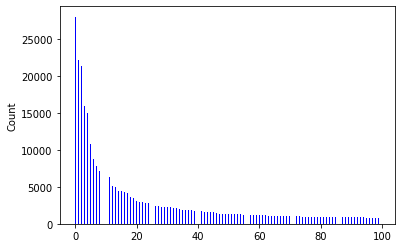

In [21]:
zif_data = Counter(" ".join(data_A['FullDescription_clean']).split()).most_common(100)
names, values = zip(*zif_data)

ind = np.arange(len(zif_data))  
width = 0.3 

fig, ax = plt.subplots()
rects1 = ax.bar(ind, values, width, color='b')

ax.set_ylabel('Count')

plt.show()

In [22]:
print(zif_data)

[('and', 28077), ('the', 22156), ('to', 21432), ('a', 15948), ('of', 15032), ('in', 10803), ('for', 8774), ('with', 7781), ('you', 7188), ('will', 6691), ('be', 6414), ('is', 6338), ('this', 5078), ('as', 4953), ('an', 4514), ('are', 4475), ('experience', 4297), ('on', 4185), ('have', 3663), ('or', 3495), ('work', 3049), ('role', 2969), ('your', 2924), ('team', 2836), ('business', 2807), ('skills', 2479), ('we', 2425), ('our', 2385), ('working', 2334), ('all', 2300), ('job', 2292), ('within', 2258), ('sales', 2202), ('that', 2129), ('client', 2028), ('management', 1925), ('their', 1920), ('at', 1867), ('manager', 1849), ('company', 1768), ('please', 1725), ('from', 1675), ('development', 1666), ('uk', 1636), ('looking', 1588), ('support', 1584), ('excellent', 1432), ('new', 1387), ('if', 1365), ('required', 1363), ('service', 1327), ('must', 1297), ('s', 1294), ('opportunity', 1274), ('â', 1273), ('who', 1248), ('by', 1237), ('it', 1223), ('successful', 1205), ('project', 1196), ('know

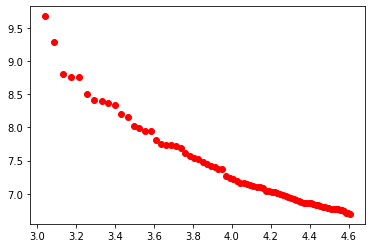

In [23]:
import scipy.stats as ss
from nltk.corpus import wordnet

amb = [(w, c, len(wordnet.synsets(w))) for (w, c) in zif_data if len(wordnet.synsets(w)) > 0]

amb_p_rank = ss.rankdata([p for (w, c, p) in amb])
amb_c_rank = ss.rankdata([c for (w, c, p) in amb])

amb_ranked = zip(amb, amb_p_rank, amb_c_rank)

import math
l = len(zif_data)
rev = [l-r+1 for r in amb_c_rank]

plt.plot([math.log(c) for c in rev], [math.log(c) for (w, c, p) in amb], 'ro')

I think the data support Zipf's Law.

If we remove stopwords and lemmatize the data, what are the 10 most common 
words? What are their frequencies?

In [24]:
wordnet_lemmatizer = WordNetLemmatizer()
nrows = len(data_A)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into a string object
    text = data_A.iloc[row]['Description_clean']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)
   
data_A['Description_lem'] = lemmatized_text_list
data_A['Description_lem'].head(10)

0     rail construction manager require largest rai...
1     eurostaff group award win international recru...
2     base middlesex senior power supply design eng...
3     look recruit experience sales engineer suppor...
4     account payable assistant vere venues â x80 x...
5     client seek processdriven automotive sales ma...
6     highly prestigious client base gaydon look ex...
7     chef partie norfolk live tip seek new role ch...
8     duration permanent description d strong admin...
9     policy analyst smarter market strategy band c...
Name: Description_lem, dtype: object

In [25]:
freqword3 = Counter(" ".join(data_A['Description_lem']).split()).most_common(10)
freq_matrix3 = pd.DataFrame(freqword3, columns=['Word', 'Frequency'])
print(freq_matrix3)

         Word  Frequency
0        work       5688
1  experience       5051
2        team       3207
3        role       2969
4    business       2807
5         job       2540
6      skills       2479
7     service       2434
8       sales       2202
9      client       2028


Part B

B1. Ignore the job descriptions, and train a model to predict high/low salary from all the 
numeric columns, e.g., part time/full time, contract vs. others, type of job (a lot of dummy 
variables), location (instead of using a huge number of dummy variables, you can use a
list of cities in England with highest cost of living and create a 0/1 variable which is 1 if 
the job is in one of those cities, else 0). What is the accuracy of your model? Show the 
confusion matrix.

In [26]:
train_df.dtypes

Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
dtype: object

In [27]:
data_B = data_B.reset_index()

In [28]:
#if location is with highest cost, then the value of it will be 1.

#copy the top 20 expensive city in UK, data from https://www.carcashpoint.co.uk/the-top-15-most-expensive-places-to-live-in-the-uk/
highcostcity = ['Cardiff', 'Worcester', 'Gloucester', 'Southampton', 'Canterbury','Bristol','Norwich','Leicester','Exeter','Salisbury','St Albans','Chelmsford','London','Brighton','Cambridge','Chichester','Truro','Bath','Oxford','Winchester']

data_B['Location'] = ''
for n in range(len(data_B)):
  if data_B['LocationNormalized'][n] in highcostcity:
    data_B['Location'][n] = 1
  else:
    data_B['Location'][n] = 0

print(data_B['Location'][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0


In [29]:
#reset contract time
data_B['Contract_Time'] = ''
for n in range(len(data_B)):
  if data_B['ContractTime'][n] == 'permanent':
    data_B['Contract_Time'][n] = 2
  elif data_B['ContractTime'][n] == 'contract':
    data_B['Contract_Time'][n] = 1
  else:
    data_B['Contract_Time'][n] = 0

print(data_B['Contract_Time'][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


2


In [30]:
#reset contract type
data_B['Contract_Type'] = ''
for n in range(len(data_B)):
  if data_B['ContractType'][n] == 'full_time':
    data_B['Contract_Type'][n] = 2
  elif data_B['ContractType'][n] == 'part_time':
    data_B['Contract_Type'][n] = 1
  else:
    data_B['Contract_Type'][n] = 0

print(data_B['Contract_Type'][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0


In [31]:
data_B['Category'].value_counts(normalize=True)

IT Jobs                             0.1576
Engineering Jobs                    0.1004
Healthcare & Nursing Jobs           0.0856
Accounting & Finance Jobs           0.0784
Sales Jobs                          0.0748
Other/General Jobs                  0.0732
Teaching Jobs                       0.0448
Hospitality & Catering Jobs         0.0444
PR, Advertising & Marketing Jobs    0.0400
Trade & Construction Jobs           0.0388
Admin Jobs                          0.0332
HR & Recruitment Jobs               0.0292
Retail Jobs                         0.0268
Customer Services Jobs              0.0256
Logistics & Warehouse Jobs          0.0172
Social work Jobs                    0.0164
Legal Jobs                          0.0152
Manufacturing Jobs                  0.0136
Consultancy Jobs                    0.0128
Scientific & QA Jobs                0.0124
Charity & Voluntary Jobs            0.0108
Travel Jobs                         0.0100
Energy, Oil & Gas Jobs              0.0096
Maintenance

In [32]:
#classify salary
high_salary = np.percentile(data_B['SalaryNormalized'], 75)

data_B['Salary'] = ''
for n in range(len(data_B)):
  if data_B['SalaryNormalized'][n] >= high_salary:
    data_B['Salary'][n] = 1
  else:
    data_B['Salary'][n] = 0

print(data_B['Salary'][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0


In [33]:
print(high_salary)

42500.0


In [34]:
predictors = ['Location','Contract_Time','Contract_Type','Category']
outcomes = 'Salary'

In [35]:
data_B['Salary'] = data_B.Salary.astype(float)

In [36]:
data_B.dtypes

index                   int64
Id                      int64
Title                  object
FullDescription        object
LocationRaw            object
LocationNormalized     object
ContractType           object
ContractTime           object
Company                object
Category               object
SalaryRaw              object
SalaryNormalized        int64
SourceName             object
Location               object
Contract_Time          object
Contract_Type          object
Salary                float64
dtype: object

In [37]:
from sklearn.model_selection import train_test_split

import sys
!{sys.executable} -m pip install dmba
from dmba import classificationSummary

X = pd.get_dummies(data_B[predictors], drop_first=True)
y = data_B[outcomes]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn.naive_bayes import BernoulliNB
classifier1 = BernoulliNB()
classifier1.fit(train_X, train_y)

# print performance measures
classificationSummary(train_y, classifier1.predict(train_X))

Confusion Matrix (Accuracy 0.7240)

       Prediction
Actual   0   1
     0 983 106
     1 308 103


In [42]:
#Confusion matrix of BernoulliNB
from sklearn.metrics import f1_score


print('Train set:')
classificationSummary(train_y, classifier1.predict(train_X))
print('F1 Score:')
f1_train = f1_score(train_y, classifier1.predict(train_X))
print(f1_train)

print('')
print('Validation set:')
classificationSummary(valid_y, classifier1.predict(valid_X))
print('F1 Score:')
f1_score(valid_y, classifier1.predict(valid_X))

Train set:
Confusion Matrix (Accuracy 0.7240)

       Prediction
Actual   0   1
     0 983 106
     1 308 103
F1 Score:
0.33225806451612905

Validation set:
Confusion Matrix (Accuracy 0.7430)

       Prediction
Actual   0   1
     0 673  78
     1 179  70
F1 Score:


0.3526448362720403

In [44]:
from sklearn.naive_bayes import MultinomialNB
classifier2 = MultinomialNB()
classifier2.fit(train_X, train_y)
classificationSummary(train_y, classifier2.predict(train_X))

Confusion Matrix (Accuracy 0.7380)

       Prediction
Actual    0    1
     0 1059   30
     1  363   48


In [45]:
#Confusion matrix of MultinomialNB
print('Train set:')
classificationSummary(train_y, classifier2.predict(train_X))
print('F1 Score:')
f1_train2 = f1_score(train_y, classifier2.predict(train_X))
print(f1_train2)

print('')
print('Validation set:')
classificationSummary(valid_y, classifier2.predict(valid_X))
print('F1 Score:')
f1_score(valid_y, classifier2.predict(valid_X))

Train set:
Confusion Matrix (Accuracy 0.7380)

       Prediction
Actual    0    1
     0 1059   30
     1  363   48
F1 Score:
0.19631901840490798

Validation set:
Confusion Matrix (Accuracy 0.7590)

       Prediction
Actual   0   1
     0 729  22
     1 219  30
F1 Score:


0.19933554817275748

the accuracy of Bernoulli is a little bit better, around 0.75, also with better f1 score.

 B2. Now build a classification model with text (full job description) as the only predictor. 
What is the accuracy of your model? Show the confusion matrix. Also show the top 10 
words (excluding stopwords) that are most indicative of (i) high salary, and (ii) low 
salary. 

In [46]:
#data cleaning

data_B['FullDescription_nostopwd'] = data_B['FullDescription'].str.lower().map(remove_stopword)
data_B['Description_clean'] = data_B['FullDescription_nostopwd'].map(clean_punctuations_and_noise)
data_B['Description_tokenized'] = data_B['Description_clean'].map(remove_stopword)
data_B['Description_clean'] = data_B['Description_tokenized'].map(clean_punctuations_and_noise)
data_B['Description_clean'].head(10)

nrows1 = len(data_B)
lemmatized_text_list1 = []

for row in range(0, nrows1):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into a string object
    text = data_B.iloc[row]['Description_clean']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list1.append(lemmatized_text)
   
data_B['Description_lem'] = lemmatized_text_list1
data_B['Description_lem'].head(10)

0     opportunity asset management coordinator work...
1     market executive lift equipment market execut...
2     finance manager dynamics east london k financ...
3     plc lead software engineer responsible delive...
4     large market lead diverse business look exper...
5     support engineer network servers field base r...
6     assess plan deliver implement high standard n...
7     establish repute security systems company cur...
8     skilled production downstream operator salary...
9     technical project manager â x80 x93 residenti...
Name: Description_lem, dtype: object

In [47]:
text_data = data_B['Description_lem']
label = data_B[outcomes]

In [48]:
#text_data.reshape(2500,1)
text_data1 = text_data.values.reshape(2500,1)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from operator import itemgetter
from sklearn import metrics
from sklearn.metrics import classification_report

In [80]:
ngram_range = (1,2)
min_df = 1
max_df = 10
max_features = 600

In [81]:
X1 = data_B['Description_lem']
y1 = data_B[outcomes]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.4, random_state=1)

tfidf = TfidfVectorizer(encoding='utf-8',ngram_range=ngram_range,stop_words=None,lowercase=False,max_df=max_df,min_df=min_df,max_features=max_features,norm='l2',sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1500, 600)
(1000, 600)


In [82]:
#BernoulliNB classifier
classifier1.fit(features_train, y_train)
#MultinomialNB classifier
classifier2.fit(features_train, y_train)

y_predicted1 = classifier1.predict(features_test)
y_predicted2 = classifier2.predict(features_test)

In [83]:
print('\nHere is the confusion matrix of MultinomialNB classifier:')
print('Train set:')
classificationSummary(y_train, classifier2.predict(features_train))
print('F1 Score:')
f1_text1 = f1_score(y_train, classifier2.predict(features_train))
print(f1_text1)
print('')
print('Validation set:')
classificationSummary(y_test, classifier2.predict(features_test))
print('F1 Score:')
f1_text2 = f1_score(y_test, classifier2.predict(features_test))
print(f1_text2)


Here is the confusion matrix of MultinomialNB classifier:
Train set:
Confusion Matrix (Accuracy 0.8287)

       Prediction
Actual    0    1
     0 1061   28
     1  229  182
F1 Score:
0.5861513687600644

Validation set:
Confusion Matrix (Accuracy 0.7630)

       Prediction
Actual   0   1
     0 699  52
     1 185  64
F1 Score:
0.35068493150684926


In [84]:
print('\nHere is the confusion matrix of BernoulliNB classifier:')
print('Train set:')
classificationSummary(y_train, classifier1.predict(features_train))
print('F1 Score:')
f1_text3 = f1_score(y_train, classifier1.predict(features_train))
print(f1_text3)
print('')
print('Validation set:')
classificationSummary(y_test, classifier1.predict(features_test))
print('F1 Score:')
f1_text4 = f1_score(y_test, classifier1.predict(features_test))
print(f1_text4)


Here is the confusion matrix of BernoulliNB classifier:
Train set:
Confusion Matrix (Accuracy 0.8253)

       Prediction
Actual    0    1
     0 1020   69
     1  193  218
F1 Score:
0.6246418338108882

Validation set:
Confusion Matrix (Accuracy 0.7500)

       Prediction
Actual   0   1
     0 665  86
     1 164  85
F1 Score:
0.4047619047619048


the accuracy (76.3% for MultinomialNB, and 75% for BernoulliNB) is a little bit better than using numeric columns (75%)

In [93]:
type(y1)

pandas.core.series.Series

In [94]:
y1.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Salary, dtype: float64

In [100]:
data_B2 = pd.concat([X1,y1],axis=1)
data_B2.head(5)

,Description_lem,Salary
0,opportunity asset management coordinator work...,0.0
1,market executive lift equipment market execut...,0.0
2,finance manager dynamics east london k financ...,0.0
3,plc lead software engineer responsible delive...,0.0
4,large market lead diverse business look exper...,0.0


In [104]:
data_low = data_B2[data_B2['Salary']==0]
data_high = data_B2[data_B2['Salary']==1]

In [105]:
data_low.head(5)

,Description_lem,Salary
0,opportunity asset management coordinator work...,0.0
1,market executive lift equipment market execut...,0.0
2,finance manager dynamics east london k financ...,0.0
3,plc lead software engineer responsible delive...,0.0
4,large market lead diverse business look exper...,0.0


In [106]:
#most frequent words for low salary
freqword_low = Counter(" ".join(data_low['Description_lem']).split()).most_common(10)
freq_matrix_low = pd.DataFrame(freqword_low, columns=['Word', 'Frequency'])
print(freq_matrix_low)

         Word  Frequency
0        work       4033
1  experience       3505
2        role       2169
3        team       2144
4     service       1893
5         job       1884
6       sales       1829
7    business       1692
8      skills       1678
9     company       1541


In [107]:
#most frequent words for high salary
freqword_high = Counter(" ".join(data_high['Description_lem']).split()).most_common(10)
freq_matrix_high = pd.DataFrame(freqword_high, columns=['Word', 'Frequency'])
print(freq_matrix_high)

         Word  Frequency
0  experience       1618
1        work       1353
2    business       1011
3        team        990
4        role        869
5     project        867
6  management        720
7      skills        662
8     manager        645
9      client        608


 B3. Train a “hybrid” model to predict high/low salary using both numeric and text data. 
Show the accuracy of the model and the confusion matrix. Which model – numeric only, 
text only and hybrid – provided the highest accuracy in predicting high/low salary? Did 
the result surprise you? Why or why not?

In [64]:
data_B.dtypes

index                         int64
Id                            int64
Title                        object
FullDescription              object
LocationRaw                  object
LocationNormalized           object
ContractType                 object
ContractTime                 object
Company                      object
Category                     object
SalaryRaw                    object
SalaryNormalized              int64
SourceName                   object
Location                     object
Contract_Time                object
Contract_Type                object
Salary                      float64
FullDescription_nostopwd     object
Description_clean            object
Description_tokenized        object
Description_lem              object
dtype: object

In [85]:
data_numberic = pd.get_dummies(data_B[predictors], drop_first=True)
data_text = tfidf.fit_transform(text_data).toarray()

In [68]:
type(data_numberic)

pandas.core.frame.DataFrame

In [69]:
type(data_text)

numpy.ndarray

In [71]:
data_text.shape

(2500, 300)

In [86]:
df_text = pd.DataFrame(data_text)

In [87]:
data_B3 = pd.concat([data_numberic,df_text],axis=1)

In [88]:
y_B3 = data_B[outcomes]

In [89]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_B3, y_B3, test_size=0.4, random_state=1)

In [90]:
#BernoulliNB classifier
classifier1.fit(X_train1, y_train1)
#MultinomialNB classifier
classifier2.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


MultinomialNB()

In [91]:
print('\nHere is the confusion matrix of MultinomialNB classifier:')
print('Train set:')
classificationSummary(y_train1, classifier2.predict(X_train1))
print('F1 Score:')
f1_text_B1 = f1_score(y_train1, classifier2.predict(X_train1))
print(f1_text_B1)
print('')
print('Validation set:')
classificationSummary(y_test1, classifier2.predict(X_test1))
print('F1 Score:')
f1_text_B2 = f1_score(y_test1, classifier2.predict(X_test1))
print(f1_text_B2)


Here is the confusion matrix of MultinomialNB classifier:
Train set:
Confusion Matrix (Accuracy 0.8160)

       Prediction
Actual    0    1
     0 1049   40
     1  236  175
F1 Score:
0.5591054313099042

Validation set:
Confusion Matrix (Accuracy 0.7610)

       Prediction
Actual   0   1
     0 680  71
     1 168  81
F1 Score:
0.40399002493765584


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [92]:
print('\nHere is the confusion matrix of BernoulliNB classifier:')
print('Train set:')
classificationSummary(y_train, classifier1.predict(X_train1))
print('F1 Score:')
f1_text_B3 = f1_score(y_train, classifier1.predict(X_train1))
print(f1_text_B3)
print('')
print('Validation set:')
classificationSummary(y_test, classifier1.predict(X_test1))
print('F1 Score:')
f1_text_B4 = f1_score(y_test, classifier1.predict(X_test1))
print(f1_text_B4)


Here is the confusion matrix of BernoulliNB classifier:
Train set:
Confusion Matrix (Accuracy 0.7973)

       Prediction
Actual    0    1
     0 1027   62
     1  242  169
F1 Score:
0.5264797507788161

Validation set:
Confusion Matrix (Accuracy 0.7640)

       Prediction
Actual   0   1
     0 670  81
     1 155  94
F1 Score:
0.4433962264150943


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


The accuracy of hybrid model is little bit better than above two. It doesn't really surprise me for the hybrid model provides more information, so that the result should be better. I am confused about the fact the improvement is not very much, only like one percentage. I guess the reason could be the information that text have is quite similar to numberic variable, so there is little extra information that the hybrid model could offer.